In [1]:
import pycbc.psd
import matplotlib.pylab as plt
import numpy as np
import pycbc.noise
from gwpy.frequencyseries import FrequencySeries


In [2]:
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048/ delta_f) + 1
psd_H = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

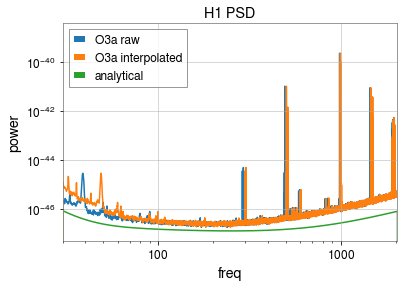

In [3]:
filename = '../data/PSDs/O3a_representative_psd/H1.txt'
psd = pycbc.psd.from_txt(filename, flen, delta_f,
                         flow, is_asd_file=True)
psd_raw = pycbc.types.load_frequencyseries(filename)
plt.loglog(psd_raw.sample_frequencies, psd_raw**2, label='O3a raw')
plt.loglog(psd.sample_frequencies, psd, label='O3a interpolated')

plt.loglog(psd_H.sample_frequencies, psd_H, label='analytical')
plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('H1 PSD')
plt.show()

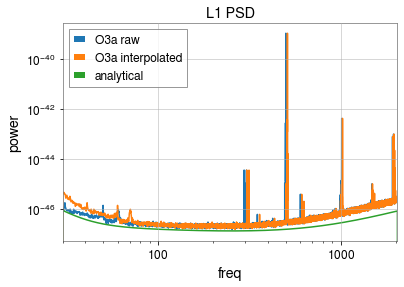

In [4]:
filename = '../data/PSDs/O3a_representative_psd/L1.txt'
psd = pycbc.psd.from_txt(filename, flen, delta_f,
                         flow, is_asd_file=True)
psd_raw = pycbc.types.load_frequencyseries(filename)
plt.loglog(psd_raw.sample_frequencies, psd_raw**2, label='O3a raw')
plt.loglog(psd.sample_frequencies, psd, label='O3a interpolated')

plt.loglog(psd_H.sample_frequencies, psd_H, label='analytical')
plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('L1 PSD')
plt.show()

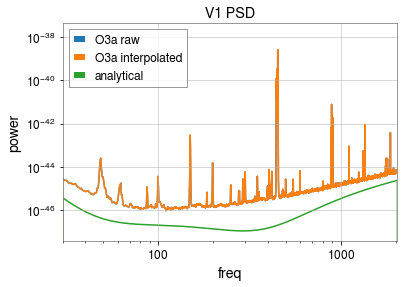

In [5]:
psd_V  = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
filename = '../data/PSDs/O3a_representative_psd/V1.txt'
psd = pycbc.psd.from_txt(filename, flen, delta_f,
                         flow, is_asd_file=True)
psd_raw = pycbc.types.load_frequencyseries(filename)
plt.loglog(psd_raw.sample_frequencies, psd_raw**2, label='O3a raw')
plt.loglog(psd.sample_frequencies, psd, label='O3a interpolated')

plt.loglog(psd_V.sample_frequencies, psd_V, label='analytical')
plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('V1 PSD')
plt.show()

In [6]:
1/psd_V.delta_f

16.0

In [7]:
filename_H = '../data/PSDs/O3a_representative_psd/H1.txt'
filename_L = '../data/PSDs/O3a_representative_psd/L1.txt'

filename_V = '../data/PSDs/O3a_representative_psd/V1.txt'
flow = 20.0
delta_f = 1.0 / 16
flen = int(2048/ delta_f) + 1
psd_H = pycbc.psd.from_txt(filename_H, flen, delta_f,
                         flow, is_asd_file=True)
psd_L = pycbc.psd.from_txt(filename_L, flen, delta_f,
                         flow, is_asd_file=True)
psd_V = pycbc.psd.from_txt(filename_V, flen, delta_f,
                         flow, is_asd_file=True)
psd_H.f0 = 0
psd_L.f0 = 0
psd_V.f0 = 0
psd_H.deltaF = delta_f
psd_L.deltaF = delta_f
psd_V.deltaF = delta_f
psd_H.name = 'O3a H1'
psd_L.name = 'O3a L1'
psd_V.name = 'O3a V1'

In [8]:
import pycbc.io.live
psddict={'H1': psd_H,'L1':psd_L,'V1':psd_V}
#pycbc.io.live.make_psd_xmldoc(psddict, xmldoc=None)

In [9]:
import lal.series
#lal.series.parse_COMPLEX16FrequencySeries(psd_H)

In [10]:
!bayestar-sample-model-psd \
-o psd.xml \
--H1=aLIGOaLIGOO3LowT1800545 \
--L1=aLIGOaLIGOO3LowT1800545 \
--V1=aLIGOAdVO3LowT1800545

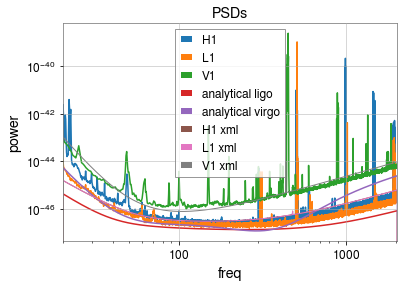

In [11]:


filename_H = '../data/PSDs/O3a_representative_psd/H1.txt'
filename_L = '../data/PSDs/O3a_representative_psd/L1.txt'

filename_V = '../data/PSDs/O3a_representative_psd/V1.txt'

flow = 20.0
delta_f = 1.0 / 16
flen = int(2048/ delta_f) + 1
psd_H = pycbc.psd.from_txt(filename_H, flen, delta_f,flow, is_asd_file=True)
psd_L = pycbc.psd.from_txt(filename_L, flen, delta_f, flow, is_asd_file=True)
psd_V = pycbc.psd.from_txt(filename_V, flen, delta_f,flow, is_asd_file=True)
plt.loglog(psd_H.sample_frequencies, psd_H, label='H1')
plt.loglog(psd_L.sample_frequencies, psd_L, label='L1')
plt.loglog(psd_V.sample_frequencies, psd_V, label='V1')
psd_V  = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
psd_H = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
plt.loglog(psd_H.sample_frequencies, psd_H, label='analytical ligo')
plt.loglog(psd_V.sample_frequencies, psd_V, label='analytical virgo')
plt.plot(FrequencySeries.read("psd.xml",instrument='H1'),label='H1 xml',lw=1)
plt.plot(FrequencySeries.read("psd.xml",instrument='L1'),label='L1 xml',lw=1)

plt.plot(FrequencySeries.read("psd.xml",instrument='V1'),label='V1 xml',lw=1)

plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('PSDs')
plt.show()

In [12]:
!bayestar-sample-model-psd \
-o analytical_psd.xml \
--H1=aLIGOZeroDetHighPower \
--L1=aLIGOZeroDetHighPower \
--V1=AdvVirgo

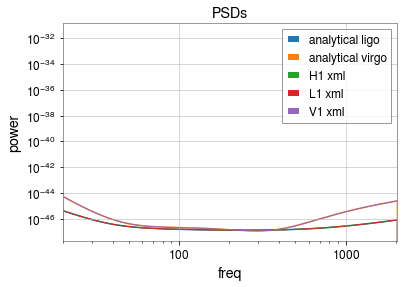

In [13]:
psd_V  = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
psd_H = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
plt.loglog(psd_H.sample_frequencies, psd_H, label='analytical ligo')
plt.loglog(psd_V.sample_frequencies, psd_V, label='analytical virgo')
plt.plot(FrequencySeries.read("analytical_psd.xml",instrument='H1'),label='H1 xml',lw=1)
plt.plot(FrequencySeries.read("analytical_psd.xml",instrument='L1'),label='L1 xml',lw=1)
plt.plot(FrequencySeries.read("analytical_psd.xml",instrument='V1'),label='V1 xml',lw=1)
plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('PSDs')
plt.show()

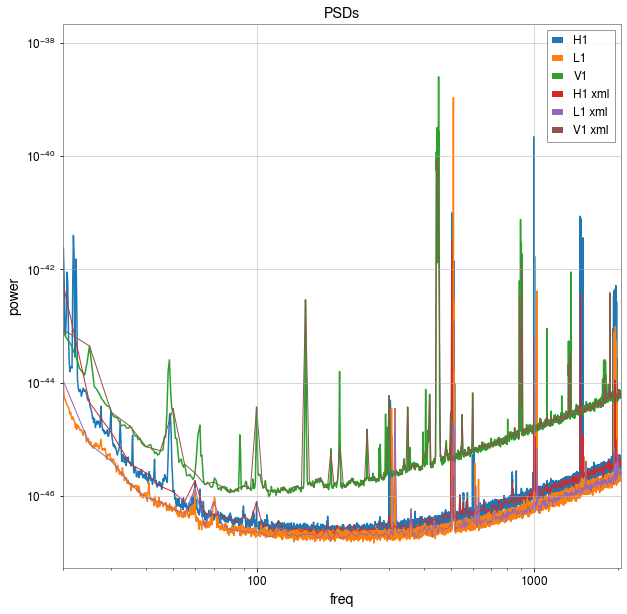

In [15]:
plt.figure(figsize=(10,10))
filename_H = '../data/PSDs/O3a_representative_psd/H1.txt'
filename_L = '../data/PSDs/O3a_representative_psd/L1.txt'

filename_V = '../data/PSDs/O3a_representative_psd/V1.txt'
flow = 20.0
delta_f = 1.0 / 16
flen = int(2048/ delta_f) + 1
psd_H = pycbc.psd.from_txt(filename_H, flen, delta_f,flow, is_asd_file=True)
psd_L = pycbc.psd.from_txt(filename_L, flen, delta_f, flow, is_asd_file=True)
psd_V = pycbc.psd.from_txt(filename_V, flen, delta_f,flow, is_asd_file=True)
plt.loglog(psd_H.sample_frequencies, psd_H, label='H1')
plt.loglog(psd_L.sample_frequencies, psd_L, label='L1')
plt.loglog(psd_V.sample_frequencies, psd_V, label='V1')

#psd_V  = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
#psd_H = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
#plt.loglog(psd_H.sample_frequencies, psd_H, label='analytical ligo')
#plt.loglog(psd_V.sample_frequencies, psd_V, label='analytical virgo')
plt.plot(FrequencySeries.read("../data/PSDs/O3a_representative_psd/O3a_representative.xml",instrument='H1'),label='H1 xml',lw=1)
plt.plot(FrequencySeries.read("../data/PSDs/O3a_representative_psd/O3a_representative.xml",instrument='L1'),label='L1 xml',lw=1)
plt.plot(FrequencySeries.read("../data/PSDs/O3a_representative_psd/O3a_representative.xml",instrument='V1'),label='V1 xml',lw=1)
plt.xlabel('freq')
plt.ylabel('power')
plt.xlim(flow,2048)
plt.legend()
plt.title('PSDs')
plt.show()